## Fastai library over pytorch to DL

In [1]:
#In Colab, you need to install the Kaggle library.
!pip install -q kaggle;

In [3]:
!pip install timm; # library with a collection of image  models

In [4]:
# upload the json file , select your json file token
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [5]:
#Move the uploaded kaggle.json file to the appropriate directory.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#list of datasets with the word alzheimers
!kaggle datasets list -s alzheimers

ref                                                   title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jboysen/mri-and-alzheimers                            MRI and Alzheimers                             13KB  2017-08-16 17:18:10          26536        477  0.85294116       
tourist55/alzheimers-dataset-4-class-of-images        Alzheimer's Dataset ( 4 class of Images)       34MB  2019-12-26 19:02:53          25712        430  0.75             
madhucharan/alzheimersdisease5classdatasetadni        Alzheimers-Disease-5-Class-Dataset-ADNI        17MB  2021-02-16 04:14:15           3275         37  0.4375           
sachinkumar413/alzheimer-mri-dataset                  Alzheimer MRI Preprocessed Dataset             28MB  2022-03-27 05:25:19           874

In [7]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 91% 31.0M/34.1M [00:00<00:00, 161MB/s]
100% 34.1M/34.1M [00:00<00:00, 156MB/s]


In [10]:
! mkdir Omdena
! unzip alzheimers-dataset-4-class-of-images.zip -d Omdena/

mkdir: cannot create directory ‘Omdena’: File exists
Archive:  alzheimers-dataset-4-class-of-images.zip
replace Omdena/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# This cell is for kaggle
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
          print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle:
    print("I'm in Kaggle")

I will try to follow notebooks from fastai course to use this library to model and analyze our brain images.

In [12]:
from fastai.vision.all import *
from fastcore.all import *
import timm

In [13]:
if iskaggle:
  path= '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train'
else: path='/content/Omdena/Alzheimer_s Dataset/train'
failed = verify_images(get_image_files(path))
files = get_image_files(path)
len(files)

5121

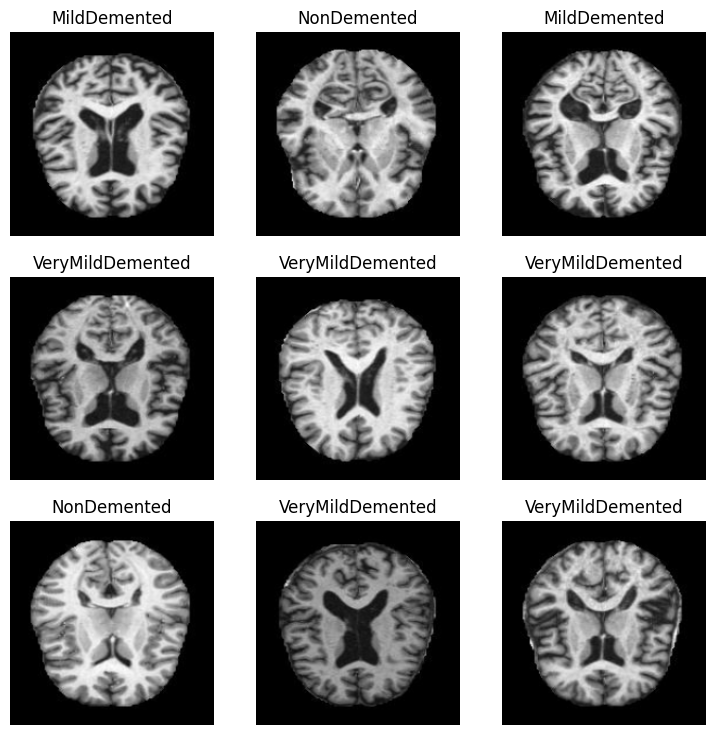

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)

In [ ]:
#subset= {'resnet18','convnext_tiny_in22k','vgg16'}
# metrics_comp=[]

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 125MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.590257,0.967440,0.368164,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.838837,0.639178,0.250977,00:17
1,0.522123,0.468464,0.173828,00:16
2,0.191314,0.228826,0.077148,00:17
3,0.071602,0.161312,0.048828,00:17
4,0.025219,0.118431,0.039062,00:16


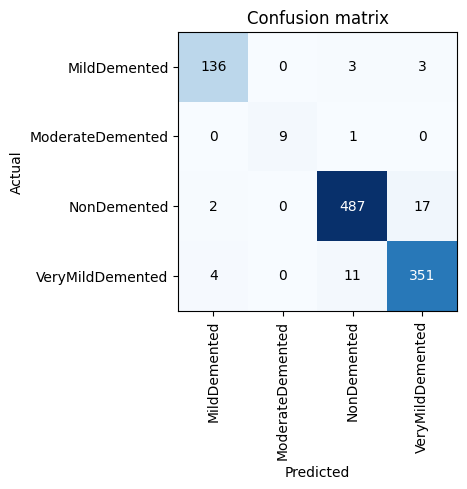

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

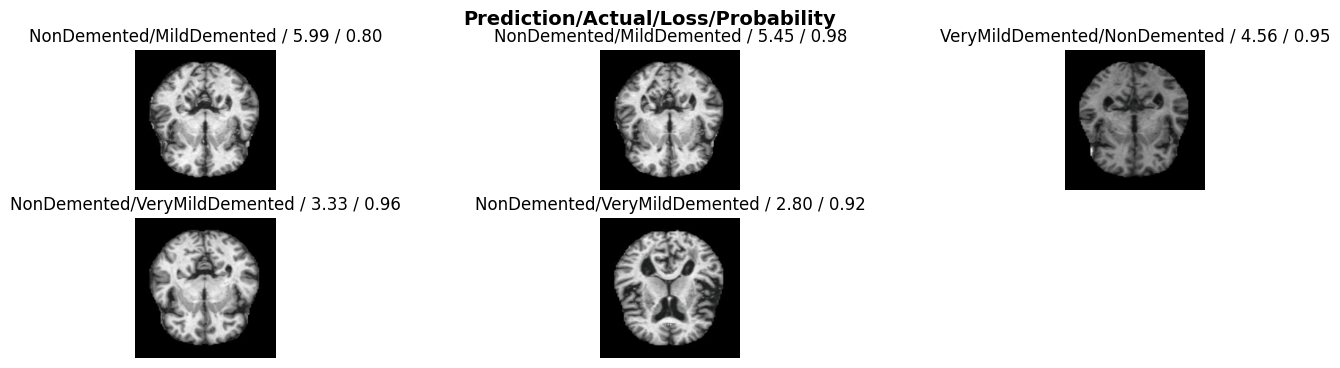

In [ ]:
interp.plot_top_losses(5,nrows=2, figsize=(17,4))

In [ ]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,error_rate,time
0,1.443983,0.839672,0.316406,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.794526,0.624240,0.236328,00:55
1,0.583830,0.456109,0.163086,00:52
2,0.339860,0.304106,0.118164,00:52
3,0.202878,0.263634,0.092773,00:53
4,0.140966,0.232583,0.088867,00:52


In [ ]:
metrics_comp.append(error_rate)

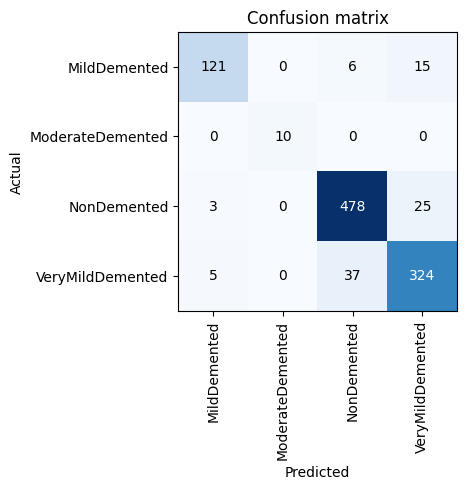

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn = vision_learner(dls, vgg16, metrics=error_rate)
learn.fine_tune(5)
metrics_comp.append(error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:10<00:00, 54.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.504618,1.064318,0.376953,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.893400,0.682536,0.290039,00:48
1,0.718078,0.621870,0.241211,00:47
2,0.473521,0.396625,0.164062,00:46
3,0.284338,0.328802,0.138672,00:46
4,0.191553,0.328071,0.127930,00:46


In [ ]:
learn = vision_learner(dls, 'regnetx_080', metrics=error_rate)
learn.fine_tune(5)


model.safetensors:   0%|          | 0.00/159M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.709819,1.188856,0.425781,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.902234,0.907983,0.361328,01:39
1,0.681974,0.783966,0.317383,01:39
2,0.375249,0.735588,0.293945,01:39
3,0.209828,0.707176,0.273438,01:38
4,0.126424,0.712539,0.268555,01:38


In [ ]:
metrics_comp.append(learn.metrics)

In [ ]:
print(metrics_comp)

[<function error_rate at 0x7c1dfa4bedd0>, <function error_rate at 0x7c1dfa4bedd0>, <function error_rate at 0x7c1dfa4bedd0>, [<fastai.learner.AvgMetric object at 0x7c1de02ae050>]]


In [ ]:
is_nondementes,_,probs = learn.predict(PILImage.create('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg'))
print(f"This is a: {is_nondementes}.")
print(f"Probability it's nondemente: {probs[2]:.4f}")
print(probs)


In [ ]:
is_nondementes,_,probs = learn.predict(PILImage.create('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/26 (100).jpg'))
print(f"This is a: {is_nondementes}.")
print(f"Probability it's nondemente: {probs[2]:.4f}")
print(probs)
